Import relevant packages:

In [1]:
from numpy import array
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
import pandas as pd

Import dataset:

In [2]:
df = pd.read_csv('https://www.dropbox.com/s/llxun0a85lpf6e3/df_final.csv?dl=1')
df['Dates'] = pd.to_datetime(df['Dates']).dt.date
#df = df[:100]

In [ ]:
df.head()

,Dates,SPTR INDEX,SPTRINFT INDEX,SPTRENRS INDEX,SPTRFINL INDEX,SPTRHLTH INDEX,SPTRINDU INDEX,SPTRCOND INDEX,SPTRUTIL INDEX,SPTRMATR INDEX,SPTRCONS INDEX,SPTRTELS INDEX,SPTRRLST INDEX,tokens
0,2006-12-12,1.010224,1.002885,1.004642,1.016601,1.014123,1.016900,1.010797,1.002999,1.016288,1.006769,0.993621,0.983808,imagine disney nbc universal team desperate co...
1,2006-12-13,1.007461,1.001175,0.982023,1.017135,1.015294,1.022835,1.006014,0.995535,1.009593,1.005985,0.992353,0.999058,amc jump public market movie theater company a...
2,2006-12-14,0.995271,0.983649,0.959095,1.006377,1.007680,1.009989,0.991821,0.990393,0.988344,1.002454,0.997374,0.985457,red sox look go sign japanese pitcher report d...
3,2006-12-15,0.989004,0.974092,0.962900,0.998287,0.997860,0.996399,0.994200,0.990149,0.974067,0.998513,0.988887,0.983588,official start award season nomination good hi...
4,2006-12-18,0.992207,0.980559,0.989430,0.993734,0.997623,0.993896,0.995171,0.997737,0.983931,0.998484,0.993293,0.982202,merck win vioxx case get victory federal case ...


## Define x and y variables:

In [130]:
# list of tokens in list of articles(in a day)
from datetime import date
token_list = list([token.split(" ") for token in df[df['Dates'] <= date(2010, 12, 31)]['tokens']])

In [131]:
# day 1
token_list[0]

['imagine',
 'disney',
 'nbc',
 'universal',
 'team',
 'desperate',
 'compete',
 'pay',
 'copyright',
 'material',
 'desperate',
 'time',
 'call',
 'desperate',
 'measure',
 'cook',
 'spoil',
 'broth',
 'movielink',
 'collaboration',
 'studio',
 'offer',
 'digital',
 'download',
 'politic',
 'get',
 'intense',
 'take',
 'longer',
 'ground',
 'trouble',
 'need',
 'team',
 'stand',
 'chance',
 'terrible',
 'weekend',
 'warner',
 'bros',
 'totally',
 'different',
 'equally',
 'disappointing',
 'film',
 'expect',
 'movie',
 'message',
 'big',
 'romantic',
 'leo',
 'pic',
 'sight',
 'set',
 'lo',
 'film',
 'cost',
 'bring',
 'ouch',
 'end',
 'warner',
 'brothers',
 'spectrum',
 'unaccompanied',
 'minors',
 'hope',
 'home',
 'bring',
 'expensive',
 'budget',
 'est',
 'look',
 'bunch',
 'dance',
 'penguin',
 'totally',
 'knock',
 'warner',
 'prospect',
 'strong',
 'christmas',
 'box',
 'office',
 'season',
 'thing',
 'cheap',
 'tv',
 'spot',
 'company',
 'call',
 'cheap',
 'tv',
 'spot',
 'lo

In [132]:
# define size of token_list
#size = len(token_list)
size = 100
size

100

In [133]:
import gensim

Train word2vec model:

In [136]:
model = gensim.models.Word2Vec(sentences = token_list, size = size, window = 5, workers = 4, min_count = 20)
# Vocab size:
words = list(model.wv.vocab)
print('vocabulary size: %d' % len(words))

vocabulary size: 7311


In [ ]:
print(words)

['imagine', 'disney', 'nbc', 'universal', 'team', 'desperate', 'compete', 'pay', 'copyright', 'material', 'time', 'call', 'measure', 'cook', 'collaboration', 'studio', 'offer', 'digital', 'download', 'politic', 'get', 'intense', 'take', 'longer', 'ground', 'trouble', 'need', 'stand', 'chance', 'terrible', 'weekend', 'warner', 'totally', 'different', 'equally', 'disappointing', 'film', 'expect', 'movie', 'message', 'big', 'sight', 'set', 'cost', 'bring', 'ouch', 'end', 'brothers', 'spectrum', 'hope', 'home', 'expensive', 'budget', 'est', 'look', 'bunch', 'dance', 'knock', 'prospect', 'strong', 'christmas', 'box', 'office', 'season', 'thing', 'cheap', 'tv', 'spot', 'company', 'lot', 'speculation', 'buy', 'tivo', 'deny', 'raise', 'question', 'commercial', 'skip', 'maybe', 'comment', 'transform', 'work', 'leave', 'merck', 'analyst', 'day', 'headquarters', 'central', 'new', 'jersey', 'reveal', 'street', 'suspect', 'drug', 'development', 'pipeline', 'type', 'plug', 'increase', 'risk', 'death

Test the model:

In [8]:
model.wv.most_similar('fake')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('phrase', 0.8317193388938904),
 ('joke', 0.8226124048233032),
 ('funny', 0.8191583752632141),
 ('tweet', 0.8003485202789307),
 ('shame', 0.7905541658401489),
 ('blogger', 0.7843666076660156),
 ('crazy', 0.7837486267089844),
 ('weird', 0.777042806148529),
 ('gossip', 0.776073694229126),
 ('rant', 0.775067925453186)]

### Importing word embeddings to Keras

In [137]:
# save the model
filename = 'article_embeddings.txt'
model.wv.save_word2vec_format(filename, binary=False)

In [ ]:
type(model)

gensim.models.word2vec.Word2Vec

In [138]:
import os
import numpy as np

embeddings_index= {}
f = open(os.path.join('', 'article_embeddings.txt'), encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    embeddings_index[word] = coefs
f.close()

In [139]:
from keras.preprocessing.text import Tokenizer

from datetime import date
token_list = list([token.split(" ") for token in df[df['Dates'] <= date(2010, 12, 31)]['tokens']])

# vectorise the text samples into a 2D integer tensor
tokenizer = Tokenizer()
tokenizer.fit_on_texts(token_list)

token_list = list([token.split(" ") for token in df['tokens']])
sequences = tokenizer.texts_to_sequences(token_list)


In [140]:
# pad sequences
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Python program to get average of a list 
def Average(lst): 
    return sum(lst) / len(lst) 

max_length = int(Average([len(doc) for doc in token_list]))
articles_pad = pad_sequences(sequences, maxlen=max_length, padding='post')
print('Shape of article tensor:', articles_pad.shape)

Found 54770 unique tokens.
Shape of article tensor: (3468, 4901)


In [141]:
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, size))

for word, i in word_index.items():
    if i > vocab_size:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [15]:
print(embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.3509108  -0.21185787 -0.6093342  ...  0.25355652  0.6357565
   0.6436059 ]
 [ 0.00085938 -0.10840287 -0.2765963  ... -0.13175198  0.33479488
   0.14926809]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [142]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import LSTM
from keras.initializers import Constant

### Keeping Embedding Layer Constant

In [143]:
# define model
model = Sequential()
embedding_layer = Embedding(vocab_size,
                           size,
                           embeddings_initializer=Constant(embedding_matrix),
                           input_length=max_length,
                           trainable=False)
# Add embedding layer
model.add(embedding_layer)

# Add a LSTM layer with 50 internal units.
model.add(LSTM(50, return_sequences=True, input_shape=(100,12)))
model.add(LSTM(50, return_sequences=True, input_shape=(100,12)))
model.add(LSTM(50))
# Add a Dense layer with 12 units.
model.add(Dense(12))
# Add compiler with XXX
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Print summary of model
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 4901, 100)         5477100   
_________________________________________________________________
lstm_12 (LSTM)               (None, 4901, 50)          30200     
_________________________________________________________________
lstm_13 (LSTM)               (None, 4901, 50)          20200     
_________________________________________________________________
lstm_14 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 12)                612       
Total params: 5,548,312
Trainable params: 71,212
Non-trainable params: 5,477,100
_________________________________________________________________
None


In [144]:
from sklearn.preprocessing import StandardScaler

y = df.iloc[:,1:13]
y = y - 1

scaler = StandardScaler()
scaler.fit(y)
y = scaler.transform(y)
y = pd.DataFrame(y)
y

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.328228,-0.005662,0.114832,0.371870,0.515165,0.490431,0.279945,0.052145,0.432752,0.260712,-0.310627,-0.458875
1,0.218686,-0.065795,-0.483748,0.384755,0.565919,0.685552,0.117066,-0.251364,0.232677,0.218241,-0.359639,-0.069889
2,-0.264687,-0.681856,-1.090487,0.125171,0.235788,0.263198,-0.366192,-0.460463,-0.402354,0.027229,-0.165538,-0.416807
3,-0.513139,-1.017837,-0.989788,-0.070064,-0.190034,-0.183631,-0.285186,-0.470386,-0.829013,-0.186015,-0.493619,-0.464488
4,-0.386152,-0.790483,-0.287718,-0.179931,-0.200319,-0.265923,-0.252105,-0.161845,-0.534231,-0.187590,-0.323295,-0.499822
...,...,...,...,...,...,...,...,...,...,...,...,...
3463,0.800756,-0.235675,4.526932,1.978131,0.710216,1.706362,-0.456198,1.177867,0.396249,1.837352,0.243138,1.297770
3464,0.795560,0.359765,2.447248,0.555283,0.306054,1.414601,0.439599,0.811077,0.319351,2.570999,0.586172,0.747912
3465,0.657002,0.863396,1.845687,0.326749,-0.169431,0.713848,0.719871,-0.594422,-0.137031,1.119623,0.546672,0.643403
3466,-0.105796,-0.360910,1.264487,0.226774,-0.861743,0.857999,-0.062321,-1.502181,0.028601,-0.053041,-0.053340,0.008449


In [12]:
y = y - 1

In [12]:
model.fit(articles_pad, y, epochs=10, verbose=1)

Epoch 1/10
109/109 [==============================] - 61s 557ms/step - loss: 1.0018
Epoch 2/10
109/109 [==============================] - 61s 558ms/step - loss: 0.9975
Epoch 3/10
109/109 [==============================] - 60s 555ms/step - loss: 0.9955
Epoch 4/10
109/109 [==============================] - 60s 554ms/step - loss: 0.9876
Epoch 5/10
109/109 [==============================] - 61s 556ms/step - loss: 0.9750
Epoch 6/10
109/109 [==============================] - 61s 559ms/step - loss: 0.9642
Epoch 7/10
109/109 [==============================] - 61s 559ms/step - loss: 0.9397
Epoch 8/10
109/109 [==============================] - 61s 556ms/step - loss: 0.8957
Epoch 9/10
109/109 [==============================] - 60s 554ms/step - loss: 0.8675
Epoch 10/10
109/109 [==============================] - 60s 554ms/step - loss: 0.8365


In [16]:
xtest_docs = pad_sequences(sequences, maxlen=max_length, padding='post')

predicted = pd.DataFrame(model.predict(xtest_docs))
predicted

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.046249,0.017442,0.073936,0.029288,0.066098,0.046099,0.025895,0.061931,0.028520,0.104203,0.060377,0.045489
1,0.046249,0.017442,0.073936,0.029288,0.066098,0.046099,0.025895,0.061931,0.028520,0.104203,0.060377,0.045489
2,0.046249,0.017442,0.073936,0.029288,0.066098,0.046099,0.025895,0.061931,0.028520,0.104203,0.060377,0.045489
3,0.046249,0.017442,0.073936,0.029288,0.066098,0.046099,0.025895,0.061931,0.028520,0.104203,0.060377,0.045489
4,0.046249,0.017442,0.073936,0.029288,0.066098,0.046099,0.025895,0.061931,0.028520,0.104203,0.060377,0.045489
...,...,...,...,...,...,...,...,...,...,...,...,...
3463,0.231876,-0.000529,0.390002,0.253543,0.281606,0.339715,0.256838,0.528814,0.240218,0.290042,0.258705,0.297900
3464,0.881221,0.745065,0.699661,0.614268,0.808219,0.826312,0.641546,0.775505,0.807437,0.931612,0.641758,0.623595
3465,0.046249,0.017442,0.073936,0.029288,0.066098,0.046099,0.025895,0.061931,0.028520,0.104203,0.060377,0.045489
3466,0.319739,0.310980,0.054761,0.263883,0.435656,0.312119,0.263095,-0.098665,0.143085,0.215959,0.209393,0.050602


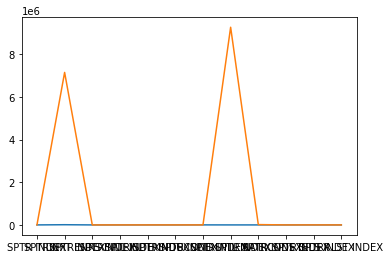

In [ ]:
y

y_test_reset = y.reset_index()
y_test_comp = (y_test_reset.iloc[:,1:]+1).product()
y_predict_comp = (predicted+1).product()

import matplotlib.pyplot as plt
plt.plot(y_test_comp)
plt.plot(y_predict_comp)
plt.show()

In [25]:
predicted = pd.DataFrame(scaler.inverse_transform(predicted))
predicted

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.001997,0.003136,0.000319,0.001244,0.002296,0.002047,0.002654,0.001761,0.001871,0.001988,0.001701,0.001874
1,0.001997,0.003136,0.000319,0.001244,0.002296,0.002047,0.002654,0.001761,0.001871,0.001988,0.001701,0.001874
2,0.001997,0.003136,0.000319,0.001244,0.002296,0.002047,0.002654,0.001761,0.001871,0.001988,0.001701,0.001874
3,0.001997,0.003136,0.000319,0.001244,0.002296,0.002047,0.002654,0.001761,0.001871,0.001988,0.001701,0.001874
4,0.001997,0.003136,0.000319,0.001244,0.002296,0.002047,0.002654,0.001761,0.001871,0.001988,0.001701,0.001874
...,...,...,...,...,...,...,...,...,...,...,...,...
3463,0.002000,0.003135,0.000336,0.001260,0.002299,0.002056,0.002660,0.001768,0.001879,0.001990,0.001705,0.001889
3464,0.002011,0.003153,0.000353,0.001285,0.002306,0.002069,0.002670,0.001772,0.001900,0.001994,0.001712,0.001909
3465,0.001997,0.003136,0.000319,0.001244,0.002296,0.002047,0.002654,0.001761,0.001871,0.001988,0.001701,0.001874
3466,0.002002,0.003143,0.000318,0.001260,0.002301,0.002055,0.002660,0.001759,0.001875,0.001989,0.001704,0.001874


In [ ]:
df.iloc[0,13]

'imagine disney nbc universal team desperate compete pay copyright material desperate time call desperate measure cook spoil broth movielink collaboration studio offer digital download politic get intense take longer ground trouble need team stand chance terrible weekend warner bros totally different equally disappointing film expect movie message big romantic leo pic sight set lo film cost bring ouch end warner brothers spectrum unaccompanied minors hope home bring expensive budget est look bunch dance penguin totally knock warner prospect strong christmas box office season thing cheap tv spot company call cheap tv spot lot speculation cheap tv spot buy tivo company deny raise question buy commercial skip company maybe question comment company transform transform lot work leave merck analyst day company headquarters central new jersey company reveal tine street suspect call cetp inhibitor drug development pipeline type drug pfizerpulle plug increase risk death long clinical trial merc

In [21]:
tokenizer.texts_to_sequences(['frederik', 'be', 'possibly', 'genius', 'raaaaw'])

[[159515], [8185], [1682], [5553], []]

In [26]:
len(sequences[0])

293

In [24]:
pad_sequences(sequences[0:1], maxlen=max_length)

array([[  0,   0,   0, ..., 107,  70, 987]], dtype=int32)

In [25]:
xtest_docs

array([[ 2049,   798,   448, ...,     0,     0,     0],
       [ 4892,   688,    89, ...,     0,     0,     0],
       [ 1026,  5816,    39, ...,     0,     0,     0],
       ...,
       [ 1031,  3269,     3, ...,     0,     0,     0],
       [ 2446,  2290,   392, ...,     3,  7388,   987],
       [  152,   570,   353, ...,    35, 23072,   987]], dtype=int32)

In [145]:
def walk_forward_validation(model, epochs, x, y, step_size, train_steps, val_window):
    
    from sklearn.metrics import mean_squared_error
    
    n_records = len(x)
    n_init_train = step_size * train_steps
    train_pred = []
    val_pred = []
    mse_scores = []
    for i in range(n_init_train, n_records, step_size):
      
        train_from = i-n_init_train
        train_to = i
        test_from = i+1
        test_to = i+val_window

        x_train, x_test = x[train_from:train_to], x[test_from:test_to]
        y_train, y_test = y[train_from:train_to], y[test_from:test_to]
        
        print(f'Train from {i-n_init_train} to {i} and validate for {i+1} to {i+val_window}')
        model.fit(x_train, y_train, epochs=epochs, verbose=1)

        y_train_pred = model.predict(x_train)
        for y_train_day in y_train_pred:
            train_pred.append(y_train_day.tolist())
        
        y_pred = model.predict(x_test)
        for y_test_day in y_pred:
            val_pred.append(y_test_day.tolist())

        train_mse = mean_squared_error(y_train,y_train_pred)
        val_mse = mean_squared_error(y_test,y_pred)
        mse_scores.append([train_mse, val_mse])

        print(f'     train: {train_mse} \nvalidation: {val_mse} \n')

    return train_pred, val_pred, mse_scores

In [146]:
epoch_tuning_performance = []
for epoch in range(1,11):
    train_pred, val_pred, validation_metrics = walk_forward_validation(model = model, epochs = epoch, x = pd.DataFrame(articles_pad[970:]), y = y[970:], step_size = 60, train_steps = 3, val_window = 60)
    validation_metrics = pd.DataFrame(validation_metrics).mean(axis=0)
    mean_train_mse = validation_metrics.iloc[0]
    mean_val_mse = validation_metrics.iloc[1]
    epoch_tuning_performance.append([mean_train_mse, mean_val_mse])

Streaming output truncated to the last 5000 lines.
6/6 [==============================] - 2s 353ms/step - loss: 0.2847
Epoch 3/3
6/6 [==============================] - 2s 350ms/step - loss: 0.2637
     train: 0.25353948708669877 
validation: 1.0987553284487783 

Train from 1860 to 2040 and validate for 2041 to 2100
Epoch 1/3
6/6 [==============================] - 2s 349ms/step - loss: 0.5488
Epoch 2/3
6/6 [==============================] - 2s 348ms/step - loss: 0.4291
Epoch 3/3
6/6 [==============================] - 2s 351ms/step - loss: 0.3592
     train: 0.32548059392790146 
validation: 0.47104699895035496 

Train from 1920 to 2100 and validate for 2101 to 2160
Epoch 1/3
6/6 [==============================] - 2s 352ms/step - loss: 0.3798
Epoch 2/3
6/6 [==============================] - 2s 351ms/step - loss: 0.3097
Epoch 3/3
6/6 [==============================] - 2s 349ms/step - loss: 0.2807
     train: 0.26086061755352735 
validation: 0.4719334960045198 

Train from 1980 to 2160 and 

In [149]:
pd.DataFrame(epoch_tuning_performance)

,0,1
0,0.705335,0.757812
1,0.486383,0.834476
2,0.375779,0.658323
3,0.315039,0.549830
4,0.269697,0.497716
5,0.238167,0.476488
6,0.218421,0.436305
7,0.204912,0.394862
8,0.216120,0.523828
9,0.201085,0.406803


In [151]:
pd.DataFrame(epoch_tuning_performance).to_csv('epoch_tuning.csv')

In [122]:
pd.DataFrame(scaler.inverse_transform(val_pred)+1).head(900)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000566,1.002740,0.996617,0.997220,1.001823,0.998195,1.001630,1.000635,0.998809,1.002897,1.000873,0.998328
1,1.000566,1.002740,0.996617,0.997220,1.001823,0.998195,1.001630,1.000635,0.998809,1.002897,1.000873,0.998328
2,1.000566,1.002740,0.996617,0.997220,1.001823,0.998195,1.001630,1.000635,0.998809,1.002897,1.000873,0.998328
3,1.000566,1.002740,0.996617,0.997220,1.001823,0.998195,1.001630,1.000635,0.998809,1.002897,1.000873,0.998328
4,1.000566,1.002740,0.996617,0.997220,1.001823,0.998195,1.001630,1.000635,0.998809,1.002897,1.000873,0.998328
...,...,...,...,...,...,...,...,...,...,...,...,...
895,1.013466,1.012343,1.011132,1.012748,1.018925,1.015822,1.010650,1.013788,1.014109,1.009295,1.012848,1.012556
896,0.999925,0.999567,0.995657,0.999254,1.002530,0.999703,1.000407,0.999612,0.997348,1.000844,0.998583,1.000861
897,1.003549,1.003494,0.997377,0.999306,1.007671,1.003728,1.002894,1.008021,0.999810,1.006493,1.004335,1.004705
898,1.015372,1.021024,1.013621,1.017878,1.013836,1.016712,1.018253,0.997044,1.016587,1.007255,1.008261,1.001904
